<a href="https://colab.research.google.com/github/vishva2410/Deep-Learning-Projects-Part-A-/blob/main/Lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from IPython import get_ipython
from IPython.display import display
import tensorflow as tf

In [3]:
df = pd.read_csv('lung_cancer_examples.csv')
df.head(3)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0


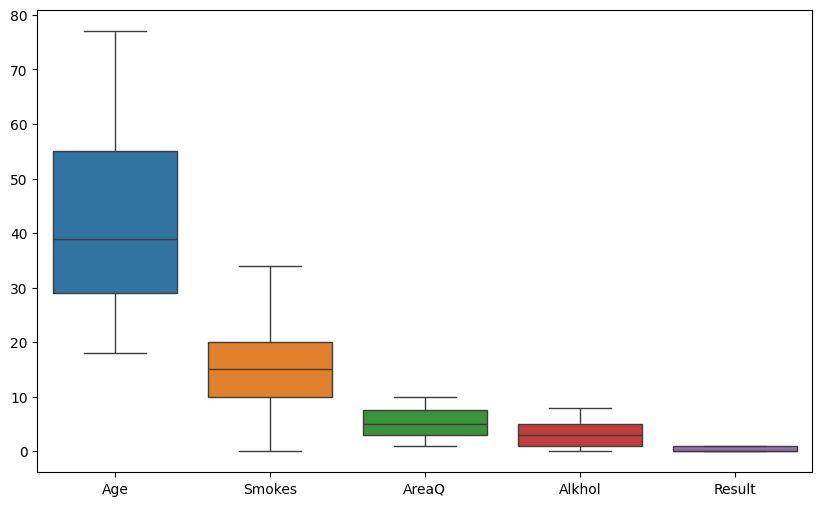

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()


In [6]:
le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Surname'] = le.fit_transform(df['Surname'])

In [8]:
x = df.drop('Result',axis=1)
y = df['Result']

In [9]:
se = StandardScaler()
x = se.fit_transform(x)

In [13]:
np.array(y)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=32)

SVC(probability=True)
1.0
1.0


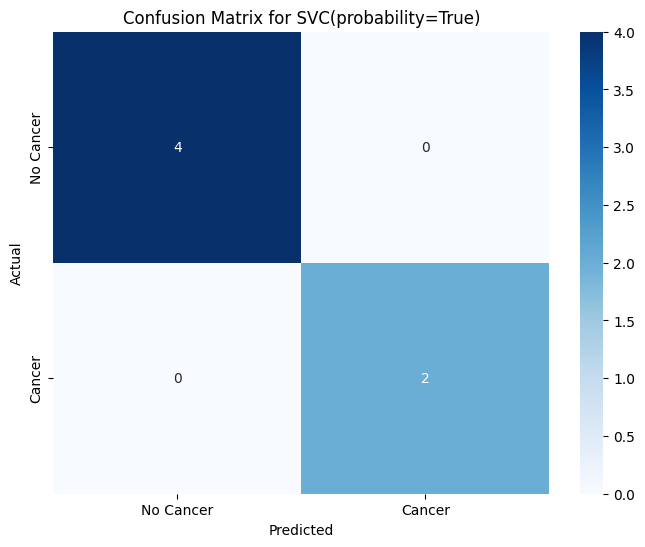

Classification Report for SVC(probability=True):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Feature importance not available for SVC(probability=True)


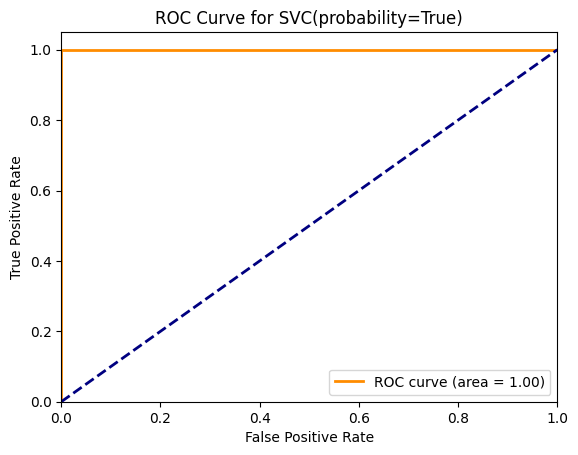

LogisticRegression()
1.0
1.0


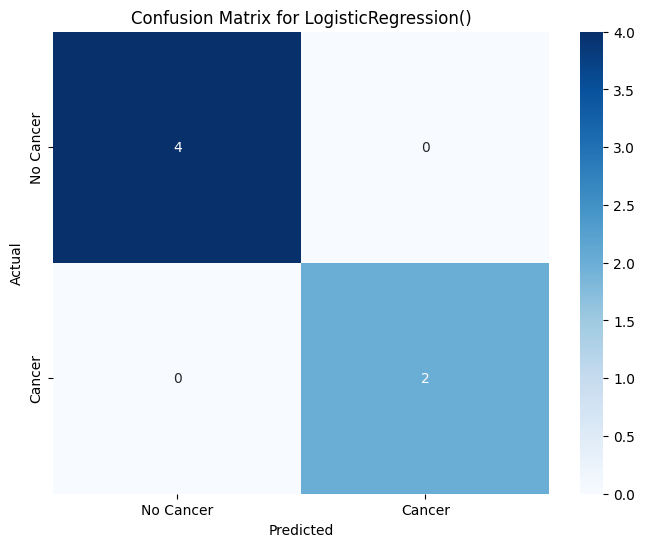

Classification Report for LogisticRegression():
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



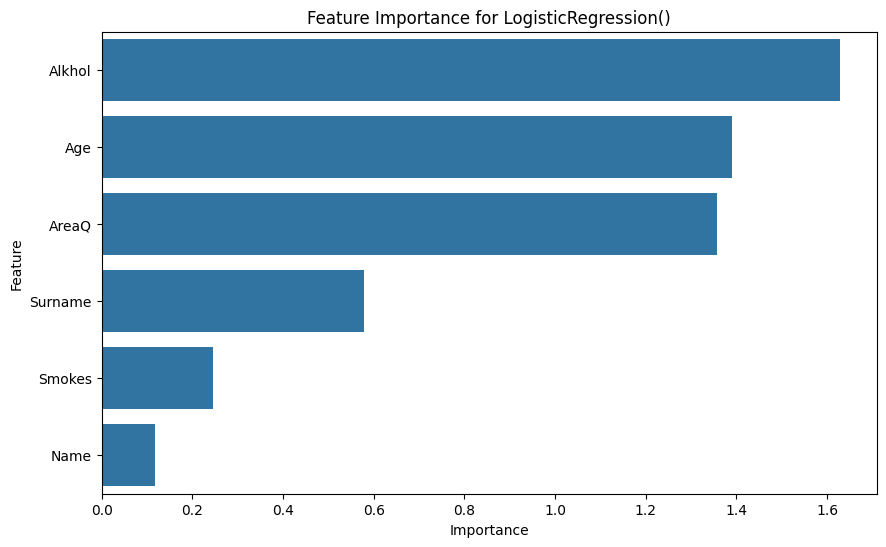

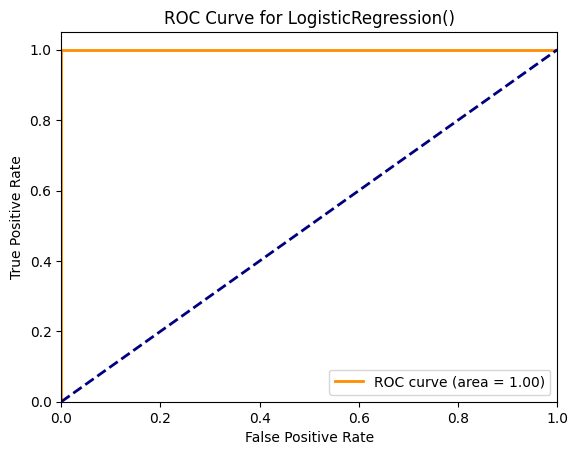

GaussianNB()
1.0
1.0


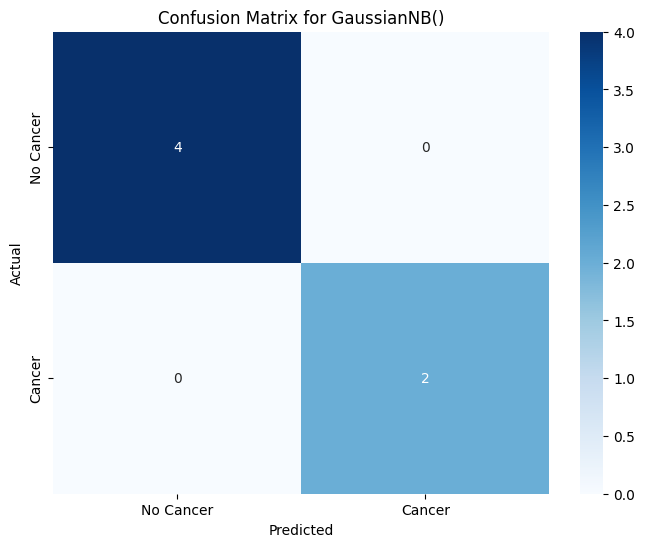

Classification Report for GaussianNB():
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Feature importance not available for GaussianNB()


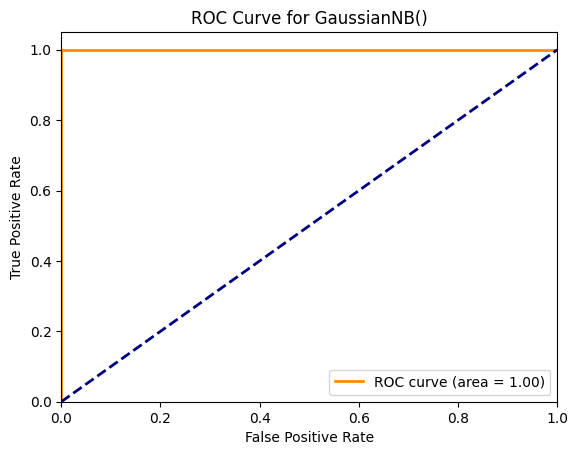

In [24]:
model = [SVC(probability=True),LogisticRegression(),GaussianNB()]
for i in range (len(model)):
  print(model[i])
  model[i].fit(x_train,y_train)
  print(model[i].score(x_test,y_test))
  y_pred = model[i].predict(x_test)
  a = accuracy_score(y_test,model[i].predict(x_test))
  print(a)
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['No Cancer','Cancer'], yticklabels=['No Cancer','Cancer'])
  plt.title(f'Confusion Matrix for {model[i]}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  print(f"Classification Report for {model[i]}:\n",classification_report(y_test,y_pred))

  try:
    importances = model[i].coef_[0]
    feature_names = df.drop('Result', axis=1).columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs(importances)})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance for {model[i]}')
    plt.show()
  except AttributeError:
    print(f"Feature importance not available for {model[i]}")

  if len(np.unique(y)) == 2:
    from sklearn.metrics import roc_curve, auc
    y_prob = model[i].predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr, color='darkorange',lw=2,label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model[i]}')
    plt.legend(loc="lower right")
    plt.show()

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,653 (108.02 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,436 (72.02 KB)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 7.5110e-04
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.3247e-04
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 7.1659e-04
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 7.0099e-04
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 6.8800e-04
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 6.7512e-04
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 6.6249e-04
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 1.0000 - loss: 0.0029 - val_

In [35]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


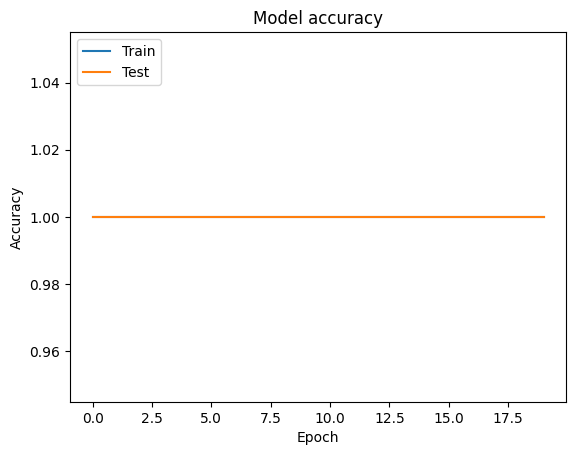

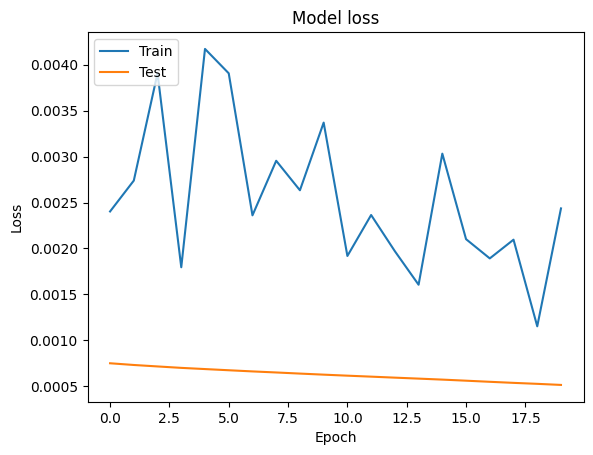

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Accuracy of the Neural Network model: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


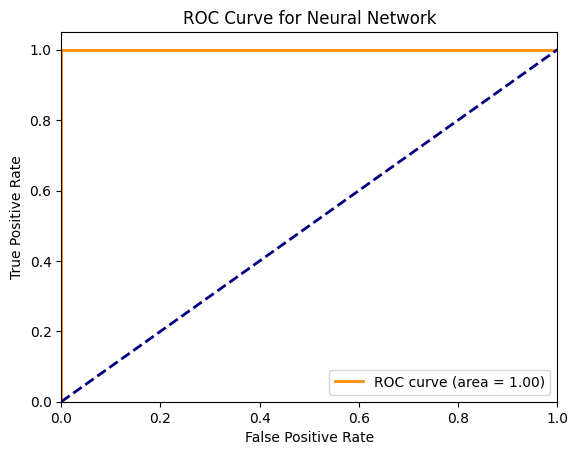

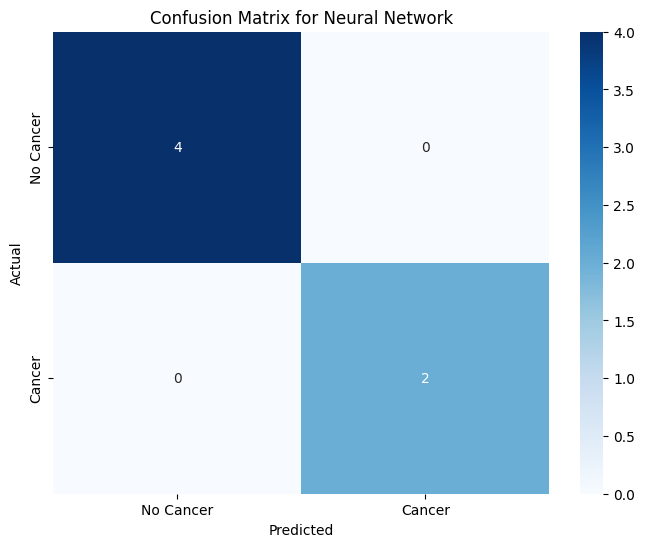

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from sklearn.metrics import accuracy_score
y_pred_classes = (model.predict(x_test) > 0.5).astype("int32") # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy of the Neural Network model: {accuracy}")

from sklearn.metrics import roc_curve, auc
y_prob = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Cancer','Cancer'], yticklabels=['No Cancer','Cancer'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
